#### Anisha Patel
#### DSC 478 Assignment 4

In [1]:
import pandas as pd
import numpy as np
from numpy import *
from numpy import linalg as la
import pdb
import pylab as pl
from matplotlib import cm
from matplotlib import pyplot as plt
import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import silhouette_samples
from sklearn.metrics import completeness_score, homogeneity_score
from sklearn import decomposition


# Que 1

# Part A

Load in the image data matrix (with rows as images and columns as features). Also load in the numeric class labels from the segmentation class file. 

In [2]:
seg_data = pd.read_table("/Users/anishapatel/Desktop/DePaul/DSC478/HW4/segmentation_data/segmentation_data.txt", delimiter =",", header = None)
seg_class= pd.read_table("/Users/anishapatel/Desktop/DePaul/DSC478/HW4/segmentation_data/segmentation_classes.txt", header = None)
seg_names = pd.read_table("/Users/anishapatel/Desktop/DePaul/DSC478/HW4/segmentation_data/segmentation_names.txt", header = None)

In [3]:
seg_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,110.0,189.0,9,0.0,0.0,1.000000,0.666667,1.222222,1.186342,12.925926,10.888889,9.222222,18.666668,-6.111111,-11.111111,17.222221,18.666668,0.508139,1.910864
1,86.0,187.0,9,0.0,0.0,1.111111,0.720082,1.444444,0.750309,13.740741,11.666667,10.333334,19.222221,-6.222222,-10.222222,16.444445,19.222221,0.463329,1.941465
2,225.0,244.0,9,0.0,0.0,3.388889,2.195113,3.000000,1.520234,12.259259,10.333334,9.333334,17.111110,-5.777778,-8.777778,14.555555,17.111110,0.480149,1.987902
3,47.0,232.0,9,0.0,0.0,1.277778,1.254621,1.000000,0.894427,12.703704,11.000000,9.000000,18.111110,-5.111111,-11.111111,16.222221,18.111110,0.500966,1.875362
4,97.0,186.0,9,0.0,0.0,1.166667,0.691215,1.166667,1.005540,15.592592,13.888889,11.777778,21.111110,-5.111111,-11.444445,16.555555,21.111110,0.442661,1.863654


In [4]:
seg_class.head()

,0,1
0,GRASS,0
1,GRASS,0
2,GRASS,0
3,GRASS,0
4,GRASS,0


In [5]:
seg_names.head()

,0
0,REGION-CENTROID-COL
1,REGION-CENTROID-ROW
2,REGION-PIXEL-COUNT
3,SHORT-LINE-DENSITY-5
4,SHORT-LINE-DENSITY-2


In [6]:
seg_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2100 entries, 0 to 2099
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       2100 non-null   float64
 1   1       2100 non-null   float64
 2   2       2100 non-null   int64  
 3   3       2100 non-null   float64
 4   4       2100 non-null   float64
 5   5       2100 non-null   float64
 6   6       2100 non-null   float64
 7   7       2100 non-null   float64
 8   8       2100 non-null   float64
 9   9       2100 non-null   float64
 10  10      2100 non-null   float64
 11  11      2100 non-null   float64
 12  12      2100 non-null   float64
 13  13      2100 non-null   float64
 14  14      2100 non-null   float64
 15  15      2100 non-null   float64
 16  16      2100 non-null   float64
 17  17      2100 non-null   float64
 18  18      2100 non-null   float64
dtypes: float64(18), int64(1)
memory usage: 311.8 KB


In [7]:
seg_class.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2100 entries, 0 to 2099
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       2100 non-null   object
 1   1       2100 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 32.9+ KB


In [8]:
seg_names.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       19 non-null     object
dtypes: object(1)
memory usage: 280.0+ bytes


# Using your favorite method (e.g., sklearn's min-max scaler), perform min-max normalization on the data matrix so that each feature is scaled to [0,1] range.

In [9]:
min_max_scaler = MinMaxScaler()

In [10]:
#Image data Normalized
seg_data_norm = min_max_scaler.fit_transform(seg_data)

In [11]:
seg_data_norm

array([[0.43083004, 0.74166667, 0.        , ..., 0.12371135, 0.50813884,
        0.83184923],
       [0.33596838, 0.73333333, 0.        , ..., 0.12739322, 0.46332908,
        0.83698646],
       [0.88537549, 0.97083333, 0.        , ..., 0.11340205, 0.48014903,
        0.84478233],
       ...,
       [0.50197628, 0.625     , 0.        , ..., 0.07216495, 0.5409177 ,
        0.17591546],
       [0.58893281, 0.6125    , 0.        , ..., 0.08100147, 0.50308645,
        0.18478933],
       [0.48616601, 0.62916667, 0.        , ..., 0.09646539, 0.4799313 ,
        0.17037463]])

# Que 1-B

# Using the Kmeans implementation in scikit-learn, perform clustering on the image data (use K = 7 in your clustering so that later we can compare the clusters to the 7 pre-assigned image classes). 

In [12]:
kmeans = KMeans(n_clusters=7, max_iter=500, verbose=1) # initialization


In [13]:
kmeans.fit(seg_data_norm)

Initialization complete
Iteration 0, inertia 510.23488454859375
Iteration 1, inertia 371.51215493984955
Iteration 2, inertia 369.1973570473977
Iteration 3, inertia 367.91071759853344
Iteration 4, inertia 367.16296881182205
Iteration 5, inertia 366.68224322921947
Iteration 6, inertia 366.15326027665253
Iteration 7, inertia 365.5951134284065
Iteration 8, inertia 365.3974079316366
Iteration 9, inertia 365.249378857024
Iteration 10, inertia 365.11115922282426
Iteration 11, inertia 365.0132815049453
Iteration 12, inertia 364.96128816035105
Iteration 13, inertia 364.9357907911737
Iteration 14, inertia 364.91871517500635
Iteration 15, inertia 364.9151108835612
Converged at iteration 15: center shift 2.8848158272548593e-06 within tolerance 4.150156953284628e-06.
Initialization complete
Iteration 0, inertia 569.3405742705019
Iteration 1, inertia 407.7125047228048
Iteration 2, inertia 401.04334849938834
Iteration 3, inertia 398.0054426076174
Iteration 4, inertia 396.33995216879987
Iteration 5, i

KMeans(max_iter=500, n_clusters=7, verbose=1)

In [14]:
clusters = kmeans.predict(seg_data_norm)

In [15]:
pd.DataFrame(clusters, columns=["Cluster"])


,Cluster
0,2
1,2
2,2
3,2
4,2
...,...
2095,5
2096,0
2097,3
2098,3


# Print the cluster centroids (use some formatting so that they are visually understandable). 

In [16]:
pd.options.display.float_format='{:,.2f}'.format

centroids = pd.DataFrame(kmeans.cluster_centers_, columns=seg_names)
centroids.T

,0,1,2,3,4,5,6
"(REGION-CENTROID-COL,)",0.25,0.54,0.51,0.77,0.30,0.25,0.75
"(REGION-CENTROID-ROW,)",0.39,0.15,0.81,0.43,0.53,0.46,0.53
"(REGION-PIXEL-COUNT,)",0.00,0.00,0.00,0.00,0.00,0.00,0.00
"(SHORT-LINE-DENSITY-5,)",0.08,0.03,0.08,0.01,0.05,0.03,0.04
"(SHORT-LINE-DENSITY-2,)",0.02,0.00,0.01,0.02,0.05,0.01,0.04
"(VEDGE-MEAN,)",0.08,0.03,0.05,0.04,0.10,0.04,0.11
"(VEDGE-SD,)",0.00,0.00,0.00,0.00,0.01,0.00,0.02
"(HEDGE-MEAN,)",0.06,0.03,0.05,0.02,0.08,0.03,0.11
"(HEDGE-SD,)",0.01,0.00,0.00,0.00,0.01,0.00,0.02
"(INTENSITY-MEAN,)",0.15,0.82,0.11,0.04,0.40,0.03,0.30


In [17]:
def cluster_sizes(clusters):
    #clusters is an array of cluster labels for each instance in the data
    
    size = {}
    cluster_labels = np.unique(clusters)
    n_clusters = cluster_labels.shape[0]

    for c in cluster_labels:
        size[c] = len(seg_data_norm[clusters == c])
    return size

In [18]:
size = cluster_sizes(clusters)

for c in size.keys():
    print("Size of Cluster", c, "= ", size[c])


Size of Cluster 0 =  335
Size of Cluster 1 =  300
Size of Cluster 2 =  297
Size of Cluster 3 =  309
Size of Cluster 4 =  236
Size of Cluster 5 =  291
Size of Cluster 6 =  332


# To evaluate your clusters, first perform Silhouette analysis on the clusters (compute Silhouette values for all instances in the data, and then compute the overall mean Silhouette value; optionally, you can provide a visualization of the Silhouettes). 

In [19]:
silhouettes = metrics.silhouette_samples(seg_data_norm, clusters)
print(silhouettes[:20])

[0.57236961 0.5609926  0.46537332 0.49551578 0.57187855 0.55971567
 0.54247867 0.41212038 0.51997981 0.46760414 0.48688779 0.49140278
 0.58398756 0.56254708 0.37898897 0.5311416  0.5484396  0.4226305
 0.41603628 0.40351227]


In [20]:
print(silhouettes.mean())

0.33207429088953827


In [21]:
def plot_silhouettes(data, clusters, metric='euclidean'):
    
    from matplotlib import cm
    from sklearn.metrics import silhouette_samples

    cluster_labels = np.unique(clusters)
    n_clusters = cluster_labels.shape[0]
    silhouette_vals = metrics.silhouette_samples(data, clusters, metric='euclidean')
    c_ax_lower, c_ax_upper = 0, 0
    cticks = []
    for i, k in enumerate(cluster_labels):
        c_silhouette_vals = silhouette_vals[clusters == k]
        c_silhouette_vals.sort()
        c_ax_upper += len(c_silhouette_vals)
        color = cm.jet(float(i) / n_clusters)
        pl.barh(range(c_ax_lower, c_ax_upper), c_silhouette_vals, height=1.0, 
                      edgecolor='none', color=color)

        cticks.append((c_ax_lower + c_ax_upper) / 2)
        c_ax_lower += len(c_silhouette_vals)
    
    silhouette_avg = np.mean(silhouette_vals)
    pl.axvline(silhouette_avg, color="red", linestyle="--") 

    pl.yticks(cticks, cluster_labels)
    pl.ylabel('Cluster')
    pl.xlabel('Silhouette coefficient')

    pl.tight_layout()
    #pl.savefig('images/11_04.png', dpi=300)
    pl.show()
    
    return

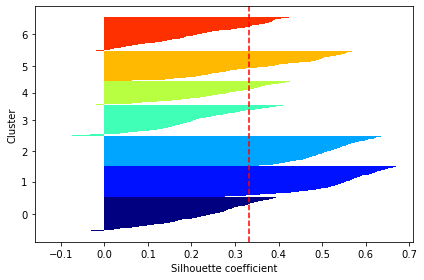

In [22]:
plot_silhouettes(seg_data_norm, clusters)


# Next, compare your 7 clusters to the 7 pre-assigned classes by computing the Completeness and Homogeneity values of the generated clusters.

In [23]:
complt_score = completeness_score(seg_class[1],clusters)
complt_score

0.6117374684331666

In [24]:
homo_score = homogeneity_score(seg_class[1], clusters)
homo_score

0.6100499914689615

# Que 1 C

# Do your own experiments with the number of clusters to see if a different value of K results in more cohesive clustering based on Silhouette analysis. Please do not provide all your clustering results, but you should include the best result according to your analysis and provide a brief discussion of why this particular clustering was selected.

In [25]:
#findding optimal value of K 
range_n_clusters = range(2,10)
silhouette_avg = []
for num_clusters in range_n_clusters:
 
 # initialise kmeans
 kmeans = KMeans(n_clusters=num_clusters, max_iter=500, verbose=1)
 kmeans.fit(seg_data_norm)
 cluster_labels = kmeans.labels_
 
 # silhouette score
 silhouette_samples = metrics.silhouette_samples(seg_data_norm, cluster_labels)
 silhouette_avg.append(silhouette_samples.mean())


Initialization complete
Iteration 0, inertia 1392.2713862652668
Iteration 1, inertia 930.5934403567251
Iteration 2, inertia 929.4425927216973
Iteration 3, inertia 929.407101523992
Iteration 4, inertia 929.3946305785207
Converged at iteration 4: center shift 2.4016058994442602e-06 within tolerance 4.150156953284628e-06.
Initialization complete
Iteration 0, inertia 1420.6916926112617
Iteration 1, inertia 933.3437616023947
Iteration 2, inertia 930.3723691604529
Iteration 3, inertia 929.4147812860059
Iteration 4, inertia 929.1699597979632
Iteration 5, inertia 928.9722930648963
Iteration 6, inertia 928.8186648426871
Iteration 7, inertia 928.7510719130618
Iteration 8, inertia 928.7344759732478
Iteration 9, inertia 928.7273079899178
Iteration 10, inertia 928.7223313208368
Iteration 11, inertia 928.7201323314196
Converged at iteration 11: strict convergence.
Initialization complete
Iteration 0, inertia 1664.6043155044167
Iteration 1, inertia 985.8403169785986
Iteration 2, inertia 944.038207458

Iteration 1, inertia 724.6434594133649
Iteration 2, inertia 678.9468475518205
Iteration 3, inertia 677.5979968612892
Iteration 4, inertia 677.4794350637662
Iteration 5, inertia 677.4415984792321
Iteration 6, inertia 677.4067817560685
Iteration 7, inertia 677.3705940127451
Iteration 8, inertia 677.3179845280372
Iteration 9, inertia 677.2810387689615
Iteration 10, inertia 677.2676559602332
Converged at iteration 10: center shift 1.5019059593629228e-06 within tolerance 4.150156953284628e-06.
Initialization complete
Iteration 0, inertia 1087.21451856256
Iteration 1, inertia 693.5827745819283
Iteration 2, inertia 677.8519011928513
Iteration 3, inertia 677.205541906751
Iteration 4, inertia 677.0497402599485
Iteration 5, inertia 676.9947304439348
Iteration 6, inertia 676.9608629944317
Iteration 7, inertia 676.9525471260586
Converged at iteration 7: center shift 2.1745698435404793e-06 within tolerance 4.150156953284628e-06.
Initialization complete
Iteration 0, inertia 1029.56147729694
Iteratio

Iteration 4, inertia 392.33624465176683
Iteration 5, inertia 392.07435671096584
Iteration 6, inertia 391.95019513221075
Iteration 7, inertia 391.90159188798157
Iteration 8, inertia 391.87808872942287
Iteration 9, inertia 391.8662900024447
Converged at iteration 9: strict convergence.
Initialization complete
Iteration 0, inertia 753.9735341809851
Iteration 1, inertia 428.64987528120145
Iteration 2, inertia 410.5927700643881
Iteration 3, inertia 405.0414549947235
Iteration 4, inertia 402.5849795517717
Iteration 5, inertia 400.029731550686
Iteration 6, inertia 397.92405902299197
Iteration 7, inertia 395.55467676402907
Iteration 8, inertia 393.43340171863855
Iteration 9, inertia 392.5673995220469
Iteration 10, inertia 392.245547011902
Iteration 11, inertia 391.996496620598
Iteration 12, inertia 391.8880499439218
Iteration 13, inertia 391.8589826591667
Iteration 14, inertia 391.8378179431047
Converged at iteration 14: center shift 3.0701459980256556e-06 within tolerance 4.150156953284628e-0

Iteration 5, inertia 377.22174703276835
Iteration 6, inertia 375.3296248720089
Iteration 7, inertia 373.4206438126306
Iteration 8, inertia 371.74938922346576
Iteration 9, inertia 370.7689875461362
Iteration 10, inertia 370.3470105604043
Iteration 11, inertia 370.04639094451215
Iteration 12, inertia 369.84575319793186
Iteration 13, inertia 369.74965746925034
Iteration 14, inertia 369.6811610502186
Iteration 15, inertia 369.6541055193186
Iteration 16, inertia 369.633562314299
Iteration 17, inertia 369.62382690103493
Iteration 18, inertia 369.61429670330983
Iteration 19, inertia 369.6064162641847
Iteration 20, inertia 369.60027663122855
Iteration 21, inertia 369.592180574356
Iteration 22, inertia 369.56927536
Iteration 23, inertia 369.53010051158867
Iteration 24, inertia 369.49127298673613
Iteration 25, inertia 369.45030770422846
Iteration 26, inertia 369.43879914139063
Iteration 27, inertia 369.43453978071113
Converged at iteration 27: center shift 1.850776906213398e-06 within tolerance 

Iteration 15, inertia 334.769902925877
Iteration 16, inertia 334.73479753559315
Iteration 17, inertia 334.69717169160174
Iteration 18, inertia 334.69599998923456
Converged at iteration 18: strict convergence.
Initialization complete
Iteration 0, inertia 464.8450538127479
Iteration 1, inertia 344.33694415206213
Iteration 2, inertia 340.02631222869934
Iteration 3, inertia 339.27191650078163
Iteration 4, inertia 339.0674241664918
Iteration 5, inertia 338.99765847376665
Iteration 6, inertia 338.98781632767657
Iteration 7, inertia 338.9847101025299
Iteration 8, inertia 338.9798489714316
Iteration 9, inertia 338.9650928332127
Iteration 10, inertia 338.95963952597
Iteration 11, inertia 338.9561114079918
Converged at iteration 11: strict convergence.
Initialization complete
Iteration 0, inertia 526.8927404488945
Iteration 1, inertia 372.43587087469825
Iteration 2, inertia 363.4575769491271
Iteration 3, inertia 360.5233705963085
Iteration 4, inertia 357.87195722024916
Iteration 5, inertia 356.9

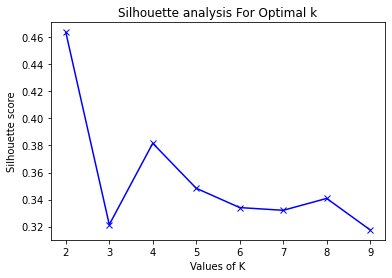

In [26]:
plt.plot(range_n_clusters,silhouette_avg, 'bx-')
plt.xlabel("Values of K") 
plt.ylabel("Silhouette score") 
plt.title("Silhouette analysis For Optimal k")
plt.show()

By looking at the plot we can say that K=2 has the highest silhouette score. It has a score of about 0.46.

# Que 1 D

# Perform PCA on the normalized image data matrix. You may use the linear algebra package in Numpy or the Decomposition module in scikit-learn (the latter is much more efficient). 

In [27]:
pca = decomposition.PCA()
seg_data_trans = pca.fit(seg_data_norm).transform(seg_data_norm)

In [28]:
np.set_printoptions(precision=2,suppress=True, edgeitems=5, linewidth=120)

In [29]:
print(seg_data_trans)

[[-0.69  0.53  0.25 -0.2  -0.08 ...  0.    0.   -0.    0.    0.  ]
 [-0.67  0.51  0.34 -0.17 -0.04 ... -0.   -0.    0.   -0.    0.  ]
 [-0.71  0.77 -0.16 -0.01 -0.17 ... -0.   -0.    0.    0.    0.  ]
 [-0.73  0.51  0.5  -0.06 -0.14 ... -0.   -0.   -0.    0.    0.  ]
 [-0.64  0.53  0.3  -0.18 -0.02 ... -0.   -0.    0.    0.    0.  ]
 ...
 [-0.5  -0.26  0.27  0.11 -0.01 ...  0.   -0.    0.   -0.    0.  ]
 [-0.5  -0.26  0.38  0.15  0.03 ...  0.    0.    0.   -0.    0.  ]
 [-0.51 -0.13 -0.08  0.1  -0.03 ... -0.   -0.   -0.    0.    0.  ]
 [-0.48 -0.09 -0.16  0.11  0.   ...  0.   -0.   -0.    0.    0.  ]
 [-0.44 -0.11 -0.05  0.15  0.02 ...  0.   -0.   -0.    0.    0.  ]]


In [30]:
print(pca.explained_variance_ratio_)

[0.61 0.13 0.1  0.05 0.04 0.02 0.02 0.02 0.01 0.01 0.   0.   0.   0.   0.   0.   0.   0.   0.  ]


# Analyze the principal components to determine the number, r, of PCs needed to capture at least 95% of variance in the data. Provide a Scree plot of PC variances. 

In [31]:
varPercentage = pca.explained_variance_ratio_*100

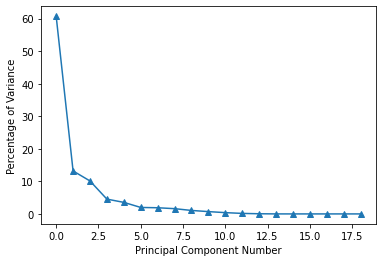

In [32]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(range(19), varPercentage[:], marker='^')
plt.xlabel('Principal Component Number')
plt.ylabel('Percentage of Variance')
plt.show()

There are 6 PC's  which capture 95% of the variance in the data. 

# Then use these r components as features to transform the data into a reduced dimension space.

In [33]:
DTtrans_reduced = seg_data_trans[:,:6]

In [34]:
print(DTtrans_reduced)


[[-0.69  0.53  0.25 -0.2  -0.08  0.05]
 [-0.67  0.51  0.34 -0.17 -0.04  0.06]
 [-0.71  0.77 -0.16 -0.01 -0.17  0.04]
 [-0.73  0.51  0.5  -0.06 -0.14  0.03]
 [-0.64  0.53  0.3  -0.18 -0.02  0.05]
 ...
 [-0.5  -0.26  0.27  0.11 -0.01 -0.01]
 [-0.5  -0.26  0.38  0.15  0.03 -0.2 ]
 [-0.51 -0.13 -0.08  0.1  -0.03 -0.03]
 [-0.48 -0.09 -0.16  0.11  0.   -0.  ]
 [-0.44 -0.11 -0.05  0.15  0.02 -0.21]]


We have reduced the number of features from 19 to 6

# Que 1 E

# Perform Kmeans again, but this time on the lower dimensional transformed data. 

In [35]:
kmeans = KMeans(n_clusters =7,max_iter=500, verbose=1)

In [36]:
kmeans.fit(seg_data_trans)

Initialization complete
Iteration 0, inertia 515.259420732008
Iteration 1, inertia 383.1965421265895
Iteration 2, inertia 375.8523468912524
Iteration 3, inertia 374.76084577801487
Iteration 4, inertia 374.434668402518
Iteration 5, inertia 374.27867162052587
Iteration 6, inertia 374.02812694347483
Iteration 7, inertia 373.6010559878014
Iteration 8, inertia 373.1152550845869
Iteration 9, inertia 372.31872349852915
Iteration 10, inertia 371.6940348283714
Iteration 11, inertia 371.0021823293387
Iteration 12, inertia 370.6272844850682
Iteration 13, inertia 370.5356709457619
Iteration 14, inertia 370.46594703294124
Iteration 15, inertia 370.43499243706907
Iteration 16, inertia 370.42464384220136
Iteration 17, inertia 370.41239021520204
Iteration 18, inertia 370.40857941643634
Converged at iteration 18: strict convergence.
Initialization complete
Iteration 0, inertia 652.2091754763082
Iteration 1, inertia 394.50444177743043
Iteration 2, inertia 383.4134946194023
Iteration 3, inertia 377.68583

KMeans(max_iter=500, n_clusters=7, verbose=1)

In [37]:
PC_clusters = kmeans.predict(seg_data_trans)

In [38]:
PC_clusters

array([3, 3, 3, 3, 3, ..., 0, 4, 5, 5, 4], dtype=int32)

# Then compare Silhouette values as well as completeness and Homogeneity values of the new clusters. 

In [39]:
PC_silhouettes = metrics.silhouette_samples(seg_data_trans, PC_clusters)
print(PC_silhouettes[:20])

[0.57 0.56 0.47 0.5  0.57 0.56 0.54 0.41 0.52 0.47 0.49 0.49 0.58 0.56 0.38 0.53 0.55 0.42 0.42 0.4 ]


In [40]:
print(PC_silhouettes.mean())

0.3320664752865722


In [41]:
PC_complt_score = completeness_score(seg_class[1],PC_clusters)
PC_complt_score

0.6131870124853009

In [42]:
PC_homo_score = homogeneity_score(seg_class[1], PC_clusters)
PC_homo_score

0.6115021163370862

# Compare these results with those obtained on the full data in part b.

In [43]:
print("------------ Without PCA-------------")
print("Silhouette Score: {}".format(silhouettes.mean()))
print("Completeness Ccore: {}".format(complt_score))
print("Homogeneity Score: {}".format(homo_score))
print("\n------------ With PCA----------------")
print("Silhouette Score: {}".format(PC_silhouettes.mean()))
print("Completeness Ccore: {}".format(PC_complt_score))
print("Homogeneity Score: {}".format(PC_homo_score))

------------ Without PCA-------------
Silhouette Score: 0.33207429088953827
Completeness Ccore: 0.6117374684331666
Homogeneity Score: 0.6100499914689615

------------ With PCA----------------
Silhouette Score: 0.3320664752865722
Completeness Ccore: 0.6131870124853009
Homogeneity Score: 0.6115021163370862


There is not that much of a differene in all the metrics between without PCA and with PCA. 

# Que 2 A

# Load in the joke ratings data and the joke text data into appropriate data structures. 

In [44]:
jester_data = pd.read_csv("/Users/anishapatel/Desktop/DePaul/DSC478/HW4/jokes/modified_jester_data.csv", header = None)
jokes = pd.read_csv("/Users/anishapatel/Desktop/DePaul/DSC478/HW4/jokes/jokes.csv", header = None, usecols=[1])

In [45]:
jester_data.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,3.18,19.79,1.34,2.84,3.48,2.50,1.15,15.17,2.02,6.24,...,13.82,0.00,0.00,0.00,0.00,0.00,5.37,0.00,0.00,0.00
1,15.08,10.71,17.36,15.37,8.62,1.34,10.27,5.66,19.88,20.22,...,13.82,6.05,10.71,18.86,10.81,8.86,14.06,11.34,6.68,12.07
2,0.00,0.00,0.00,0.00,20.03,20.27,20.03,20.27,0.00,0.00,...,0.00,0.00,0.00,20.08,0.00,0.00,0.00,0.00,0.00,0.00
3,0.00,19.35,0.00,0.00,12.80,19.16,8.18,17.21,0.00,12.84,...,0.00,0.00,0.00,11.53,0.00,0.00,0.00,0.00,0.00,0.00
4,19.50,15.61,6.83,5.61,12.36,12.60,18.04,15.61,10.56,16.73,...,16.19,16.58,15.27,16.19,16.73,12.55,14.11,17.55,12.80,12.60


In [46]:
jester_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 100 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       1000 non-null   float64
 1   1       1000 non-null   float64
 2   2       1000 non-null   float64
 3   3       1000 non-null   float64
 4   4       1000 non-null   float64
 5   5       1000 non-null   float64
 6   6       1000 non-null   float64
 7   7       1000 non-null   float64
 8   8       1000 non-null   float64
 9   9       1000 non-null   float64
 10  10      1000 non-null   float64
 11  11      1000 non-null   float64
 12  12      1000 non-null   float64
 13  13      1000 non-null   float64
 14  14      1000 non-null   float64
 15  15      1000 non-null   float64
 16  16      1000 non-null   float64
 17  17      1000 non-null   float64
 18  18      1000 non-null   float64
 19  19      1000 non-null   float64
 20  20      1000 non-null   float64
 21  21      1000 non-null   float64
 22  

In [47]:
jester_data.shape

(1000, 100)

In [48]:
jokes.head()

,1
0,"A man visits the doctor. The doctor says ""I ha..."
1,This couple had an excellent relationship goin...
2,Q. What's 200 feet long and has 4 teeth? A. Th...
3,Q. What's the difference between a man and a t...
4,Q. What's O. J. Simpson's Internet address? A....


In [49]:
jokes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   1       100 non-null    object
dtypes: object(1)
memory usage: 928.0+ bytes


In [50]:
jokes.shape

(100, 1)

# Use the "recommend" function to provide top 5 joke recommendations for users with id 4 using both Pearson and cosine similarity measures. Note the differences.  Use the standard item-based collaborative filtering (based on the rating prediction function "standEst"). 

In [51]:
def euclidSim(inA,inB):
    return 1.0 / (1.0 + la.norm(inA - inB))

def pearsonSim(inA,inB):
    if len(inA) < 3 : return 1.0
    return 0.5 + 0.5 * corrcoef(inA, inB, rowvar = 0)[0][1]

def cosineSim(inA,inB):
    num = float(inA.T * inB)
    denom = la.norm(inA)*la.norm(inB)
    return 0.5 + 0.5 * (num / denom)


In [52]:
def standEst(dataMat, user, simMeas, item):
    n = shape(dataMat)[1]
    simTotal = 0.0; ratSimTotal = 0.0
    data=mat(dataMat)
    for j in range(n):
        userRating = data[user,j]
        if userRating == 0: continue
        overLap = nonzero(logical_and(data[:,item]>0, data[:,j]>0))[0]
        if len(overLap) == 0:
            similarity = 0
        else:
            similarity = simMeas(data[overLap,item], data[overLap,j])
        #print('the %d and %d similarity is: %f' % (item, j, similarity))
        simTotal += similarity
        ratSimTotal += similarity * userRating
    if simTotal == 0: return 0
    else: return ratSimTotal/simTotal

In [53]:
def svdEst(dataMat, user, simMeas, item):
    n = shape(dataMat)[1]
    simTotal = 0.0; ratSimTotal = 0.0
    data=mat(dataMat)
    U,Sigma,VT = la.svd(data)
    Sig4 = mat(eye(4)*Sigma[:4]) #arrange Sig4 into a diagonal matrix
    xformedItems = data.T * U[:,:4] * Sig4.I  #create transformed items
    for j in range(n):
        userRating = data[user,j]
        if userRating == 0 or j==item: continue
        similarity = simMeas(xformedItems[item,:].T, xformedItems[j,:].T)
        #print('the %d and %d similarity is: %f' % (item, j, similarity))
        simTotal += similarity
        ratSimTotal += similarity * userRating
    if simTotal == 0: return 0
    else: return ratSimTotal/simTotal

In [54]:
def recommend(dataMat, user, N=3, simMeas=cosineSim, estMethod=standEst):
    unratedItems = nonzero(dataMat[user,:].A==0)[1] #find unrated items 
    if len(unratedItems) == 0: return 'you rated everything'
    itemScores = []
    for item in unratedItems:
        estimatedScore = estMethod(dataMat, user, simMeas, item)
        itemScores.append((item, estimatedScore))
    return sorted(itemScores, key=lambda jj: jj[1], reverse=True)[:N]

In [55]:
jester_matrix = np.matrix(jester_data)

In [56]:
user = 4

In [57]:
#CosineSim
cos_recommendations = recommend(jester_matrix, user, N=5, simMeas=cosineSim, estMethod=standEst)
cos_recommendations

[(71, 14.293754381681563),
 (75, 14.293605672411005),
 (79, 14.293063319114747),
 (78, 14.2908339103558),
 (70, 14.287092374768891)]

In [58]:
#Pearson
pear_recommendations = recommend(jester_matrix, user, N=5, simMeas=pearsonSim, estMethod=standEst)
pear_recommendations

[(71, 14.413443009309447),
 (75, 14.39731119844527),
 (79, 14.382511887413443),
 (78, 14.356160763938076),
 (72, 14.33436148541793)]

# Next, find the top 5 recommendations for user with id 25 only with Pearson similarity using both the standard estimator and the SVD-based version (using "svdEst" as the prediction engine) to generate these recommendations. Note the differences. When outputting recommendations, you should show both the id and the text of the recommended jokes (in decreasing order of predicted rating) as well as the predicted ratings for each.

In [59]:
def top_N_jokes(data, jokes, user, N, Means, Method):
    recom_jokes = recommend(data, user, N, simMeas=Means, estMethod=Method)
    if(recom_jokes=='you rated everything'):
        return;
    
    print("Recomemndations are: ",recom_jokes)
        
    print('\n*********************Top ',N,' jokes for user#',user,' are : ****************************** \n')
    
    for i in range(len(recom_jokes)):
        print("\t"," JOKE : (",recom_jokes[i][0],") - ",jokes[1][recom_jokes[i][0]],'\n\t RATING (Predicted) = ',recom_jokes[i][1],'\n')

    print('\n\n')

In [60]:
##StandEst with pearson similiarity
top_N_jokes(jester_matrix, jokes,25, 5,pearsonSim , standEst)

Recomemndations are:  [(99, 15.324673571007684), (71, 15.324296950553677), (97, 15.322105340570541), (82, 15.30173022502227), (91, 15.294030630051065)]

*********************Top  5  jokes for user# 25  are : ****************************** 

	  JOKE : ( 99 ) -  Q: What's the difference between greeting a Queen and greeting thePresident of the United  States?A: You only have to get on one knee to greet the queen. 
	 RATING (Predicted) =  15.324673571007684 

	  JOKE : ( 71 ) -  On the first day of college the Dean addressed the students pointing out some of the rules:"The female dormitory will be out-of-bounds for all male students and the male dormitory to the female students. Anybody caught breaking this rule will be fined $20 the first time." He continued "Anybody caught breaking this rule the second time will be fined $60. Being caught a third time will cost you a fine of $180. Are there any questions ?"At this point a male student in the crowd inquired:"How much for a season pass ?"

In [61]:
##SVD with pearson similiarity
top_N_jokes(jester_matrix, jokes,25, 5,pearsonSim , svdEst)

Recomemndations are:  [(3, 15.277088154749473), (79, 15.238062599769165), (72, 15.209188661833458), (71, 15.185021405901892), (99, 15.180560799732314)]

*********************Top  5  jokes for user# 25  are : ****************************** 

	  JOKE : ( 3 ) -  Q. What's the difference between a man and a toilet? A. A toilet doesn't follow you around after you use it. 
	 RATING (Predicted) =  15.277088154749473 

	  JOKE : ( 79 ) -  Hillary Bill Clinton and the Pope are sitting together on an airplane. Bill says "I could throw one thousand dollar bill out of this plane and make one person very happy."Hillary says "I could throw 10 hundred dollar bills out of the plane and make 10 people very happy."The Pope chips in and says "I could throw Bill out of the airplane and make the whole country happy." 
	 RATING (Predicted) =  15.238062599769165 

	  JOKE : ( 72 ) -  Q: What is the difference between George  Washington Richard Nixon and Bill Clinton? A: Washington couldn't tell a lie Nixon c

# Que 2- B

# Complete the definition for the function "test". This function iterates over all users and for each performs evaluation (by calling the provided "cross_validate_user" function) and returns the error information necessary to compute Mean Absolute Error (MAE). Use this function to perform evaluation (with 20% test-ratio for each user) comparing MAE results using the rating prediction function "standEst" with results using the "svdEst" prediction function (in both cases using Pearson similarity measure. Note that this may take several minutes depending on your computational environment. [Note: See comments provided in the module for hints on accomplishing these tasks.]

In [62]:
def cross_validate_user(dataMat, user, test_ratio, estMethod=standEst, simMeas=pearsonSim):
    dataMat = np.array(dataMat)
    number_of_items = np.shape(dataMat)[1]
    rated_items_by_user = np.array([i for i in range(number_of_items) if dataMat[user,i]>0])
    test_size = int(test_ratio * len(rated_items_by_user))
    test_indices = np.random.randint(0, len(rated_items_by_user), test_size)
    withheld_items = rated_items_by_user[test_indices]
    original_user_profile = np.copy(dataMat[user])
    dataMat[user, withheld_items] = 0 # So that the withheld test items is not used in the rating estimation below
    error_u = 0.0
    count_u = len(withheld_items)

    # Compute absolute error for user u over all test items
    for item in withheld_items:
        # Estimate rating on the withheld item
        estimatedScore = estMethod(dataMat, user, simMeas, item)
        error_u = error_u + abs(estimatedScore - original_user_profile[item])	

    # Now restore ratings of the withheld items to the user profile
    for item in withheld_items:
        dataMat[user, item] = original_user_profile[item]
    
    # Return sum of absolute errors and the count of test cases for this user
    # Note that these will have to be accumulated for each user to compute MAE
    return error_u, count_u


In [63]:
def test(dataMat, test_ratio, Method, Means):
    # Write this function to iterate over all users and for each perform evaluation by calling
    # the above cross_validate_user function on each user. MAE will be the ratio of total error 
    # across all test cases to the total number of test cases, across all users
    users = len(dataMat) #gets the number of users
    
    #we need to accumulate error and count from each user
    total_error=0
    total_count_u =0
    for user in range(users):
        error_u, count_u = cross_validate_user(dataMat, user, test_ratio, estMethod=Method, simMeas=Means)
        total_error += error_u
        total_count_u += count_u
        
    MAE = total_error/total_count_u
    return MAE;

In [64]:
%%time
std_MAE = test(jester_matrix,0.2, standEst, pearsonSim)


CPU times: user 1min 11s, sys: 624 ms, total: 1min 12s
Wall time: 1min 11s


In [65]:
print("MAE for standard estimate is: {}".format(std_MAE))

MAE for standard estimate is: 3.711894775194854


In [66]:
%%time
svd_MAE = test(jester_matrix,0.2, svdEst, pearsonSim)


CPU times: user 33min 28s, sys: 5min 51s, total: 39min 20s
Wall time: 5min 48s


In [67]:
print("MAE for SVD estimate is: {}".format(svd_MAE))

MAE for SVD estimate is: 3.648492300003624


# Que 2 C

# Write a new function "print_most_similar_jokes" which outputs the most similar jokes (based on user ratings) to a specified query joke. You function should take as input the joke ratings data, a query joke id, a parameter k for the number similar jokes, and a similarity metric function. It should output the text of the query joke as well as the texts of the top k most similar jokes in decreasing order of similarity (you should also provide the similarity values). Test your function as follows:



In [68]:
def knn_search(query_ratings_vector, dataMat, k, metric=cosineSim):
    ratings_df = pd.DataFrame(query_ratings_vector)
    data = pd.DataFrame(dataMat)
#     print(ratings_df.shape)
#     print()
#     print(data.shape)
    
    distances = []
    # comapre each joke from data with the rating vector
    for i in range(dataMat.shape[1]):
        data_rating_vector = dataMat[:,i]
        distances.append(metric(query_ratings_vector, data_rating_vector))
    
    
    distances_arr = np.array(distances);
    #print('distances array shape ',distances_arr.shape)
    distances_arr = distances_arr.argsort()
    
    kNeighbors = zeros((k,dataMat.shape[1]))
    topIndicies = []
    classCount={}
    for i in range(k):
        #voteIlabel = labels[sortedDistIndicies[i]]
        kNeighbors[i,:] = dataMat[distances_arr[i],:]
        topIndicies.append(distances_arr[i])
        
    return kNeighbors, topIndicies

In [69]:
def print_most_similar_jokes(dataMat, jokes, queryJoke, k, metric=pearsonSim):
    # Write this function to find the k most similar jokes (based on user ratings) to a queryJoke
    # The queryJoke is a joke id as given in the 'jokes.csv' file (an corresponding to the a column in dataMat)
    # You must compare ratings for the queryJoke (the column in dataMat corresponding to the joke), to all
    # other joke rating vectors and return the top k. Note that this is the same as performing KNN on the 
    # columns of dataMat. The function must retrieve the text of the joke from 'jokes.csv' file and print both
    # the queryJoke text as well as the text of the returned top-k jokes.
    
    print(' Query joke id',queryJoke, '\n\n query joke = \n   ',jokes[queryJoke])
    ##print(' Ratings\n ',dataMat[:,queryJoke])
    kNeighbors, topIndicies = knn_search(dataMat[:,queryJoke], dataMat, k , metric)
    
    print ("\n\nThe top %d recommended jokes are: "%(k))
    for ind in topIndicies:
        jok = jokes[ind]
        print()
        print ("#",ind," => ",jok)
    return

# Show the top 3 most similar jokes to joke with id 9 using Pearson similarity.


In [70]:
print_most_similar_jokes(jester_matrix,jokes[1],9,3,pearsonSim)


 Query joke id 9 

 query joke = 
    Two cannibals are eating a clown one turns to other and says: "Does this taste funny to you? 


The top 3 recommended jokes are: 

# 4  =>  Q. What's O. J. Simpson's Internet address? A.	Slash slash backslash slash slash escape.

# 18  =>  Q: If a person who speaks three languages is called "tri-lingual" and a person who speaks two languages is called "bi-lingual" what do calla person who only speaks one language?A: American! 

# 30  =>   President Clinton looks up from his desk in the Oval Office to see one of his aides nervously approach him.  "What is it?" exclaims the President. "It's this Abortion Bill Mr. President what do you want to do about it?" the aide replies. "Just go ahead and pay it." responds the President. 


## Show the top 3 most similar jokes to Joke with id 9 using cosine similarity.

In [71]:
print_most_similar_jokes(jester_matrix,jokes[1],9,3,cosineSim)


 Query joke id 9 

 query joke = 
    Two cannibals are eating a clown one turns to other and says: "Does this taste funny to you? 


The top 3 recommended jokes are: 

# 70  =>  At a recent Sacramento PC Users Group meeting a company was demonstrating its latest speech-recognition software.   A representative from the company was just about ready to start the demonstration and asked everyone in the room to quiet down.Just then someone in the back of the room yelled"Format C: Return."Someone else chimed in:"Yes Return"Unfortunately the software worked.

# 74  =>  Q: Do you know the difference between an intelligent male and theSasquatch? A: There have been actual reported sightings of the Sasquatch.

# 73  =>  Q: How many stalkers does it take to change a light bulb?A: Two. One to replace the bulb and the other to watch it day and night.


# Que 2 D

### The implementation of item-based collaborative filtering provided in the module is not scalable since for each prediction it attempts to compute pairwise similarities among all items. Develop your own item-based collaborative filtering recommender that uses a model-based approach (separating the training and the prediction tasks). In the training component, item-item similarities for all pairs of items are computed and stored in an appropriate data structure such as a pairwise similarity matrix. Your training function should be able to use different similarity functions (passed as a parameter) including cosine Similarity or Pearson correlation. The prediction (or estimation) function should take as parameters a target user, an item, a value of k, and the similarities matrix computed in the training phase. It should then return the predicted rating on the target item for the target user. The predicted rating should be the weighted average of the target user's ratings on the k most similar items to the target item (obtained from the similarity matrix). Demonstrate that your function works by computing predicted ratings for users 4 and 25, using k = 10, on top two items recommended to each user on part a (using both Pearson and cosine similarities).

In [72]:
def training_model(item_index, dataMat, metric):
    query_ratings_vector = dataMat[:,item_index]
    ratings_df = pd.DataFrame(query_ratings_vector)
    data = pd.DataFrame(dataMat)
#     print(ratings_df.shape)
#     print()
#     print(data.shape)
    
    distances = {}
    distance_arr = []
    similar_item_arr = []
    count = 0
    # comapre each joke from data with the rating vector
    for i in range(dataMat.shape[1]):
        
        ## if current item is same as input item then set the sim as 0
        if (i==item_index):
            distance_arr.append(0)
        else:
            data_rating_vector = dataMat[:,i]
            distance_arr.append(metric(query_ratings_vector, data_rating_vector))
        
        similar_item_arr.append(i)
    distances[item_index] = { 'distance' : distance_arr, 'items' : similar_item_arr}
    
    return distances

In [73]:
def prepare_training_model(dataMat, metric):
    distances = {}
    for i in range(dataMat.shape[1]):
        distances.update(training_model(i,dataMat,metric))
    
    return distances

In [74]:
%%time


tpercent = 0.8
tsize = int(tpercent * len(jester_matrix))

training_data_set = jester_matrix[:tsize,:] # 80% training data
test_data_set = jester_matrix[tsize:,:] # 20% training data



CPU times: user 31 µs, sys: 4 µs, total: 35 µs
Wall time: 18.1 µs


In [75]:
def test(user,item,k,ds):
    user_df = pd.DataFrame(user)
    
    if(k==0):
        return np.array(user_df[item])[0],[]
    
    ## get the distance info for the item
    distance = ds[item]['distance']
    
    #sort the distances    
    idx = np.argsort(distance)
    
    ## get top k similar items
    top_k = idx[:k]
    
    #print("top_k similar items ",top_k)
    
    ratings = np.array(user_df[top_k])
    
    #print("input user's ratings for similar items ",ratings)
    
    dist = sum(ratings)/k

    return dist,top_k

In [76]:
##From Part A, user 4, item 71 using Cosine similarity
## train model for training data
values = prepare_training_model(training_data_set, cosineSim)
np.set_printoptions(precision=2,suppress=True)

item = 71
K = 10
user_number = 4
user = test_data_set[user_number]

#print(np.ravel(user)[item])
pred_rating,top_k = test(user,item,K,values)

user_updated=np.ravel(user).copy()
user_updated[item] = pred_rating
print('predicted rating for user:', user_number, ' for item :',item,' \noriginal rating ',
      np.ravel(user)[item],'\npredicted rating ', user_updated[item], 'using cosine similarity.')

predicted rating for user: 4  for item : 71  
original rating  0.0 
predicted rating  9.643 using cosine similarity.


In [77]:
##From Part A, user 4, item 71 using pearson similarity

values = prepare_training_model(training_data_set, pearsonSim)

np.set_printoptions(precision=2,suppress=True)

item = 71
K = 10
user_number = 4
user = test_data_set[user_number]

#print(np.ravel(user)[item])
pred_rating,top_k = test(user,item,K,values)
print("pred_rating ",pred_rating)

user_updated=np.ravel(user).copy()
user_updated[item] = pred_rating
print('predicted rating for user:', user_number, ' for item :',item,' \noriginal rating ',
      np.ravel(user)[item],'\npredicted rating ', user_updated[item], 'using pearson similarity.')

pred_rating  9.604
predicted rating for user: 4  for item : 71  
original rating  0.0 
predicted rating  9.604 using pearson similarity.


In [78]:
##From Part A, user 25, item 99
np.set_printoptions(precision=2,suppress=True)

item = 99
K = 10
user_number = 25
user = test_data_set[user_number]

#print(np.ravel(user)[item])
pred_rating,top_k = test(user,item,K,values)
print("pred_rating ",pred_rating)

user_updated=np.ravel(user).copy()
user_updated[item] = pred_rating
print('predicted rating for user:', user_number, ' for item :',item,' \noriginal rating ',
      np.ravel(user)[item],'\npredicted rating ', user_updated[item], 'using cosine similarity.')

pred_rating  9.154
predicted rating for user: 25  for item : 99  
original rating  0.0 
predicted rating  9.154 using cosine similarity.


In [79]:
##From Part A, user 25, item 71
np.set_printoptions(precision=2,suppress=True)

item = 71
K = 10
user_number = 4
user = test_data_set[user_number]

#print(np.ravel(user)[item])
pred_rating,top_k = test(user,item,K,values)
print("pred_rating ",pred_rating)

user_updated=np.ravel(user).copy()
user_updated[item] = pred_rating
print('predicted rating for user:', user_number, ' for item :',item,' \noriginal rating ',
      np.ravel(user)[item],'\npredicted rating ', user_updated[item], 'using pearson similarity.')

pred_rating  9.604
predicted rating for user: 4  for item : 71  
original rating  0.0 
predicted rating  9.604 using pearson similarity.


# Que 2 E

### [Extra Credit - 10 pts] Modify the "cross_validate_user" and  "test" functions as necessary to use the new version of the prediction function (from part d). First test the prediction accuracy of your prediction function (similarly to part b, above) using both cosine and Pearson similarity measures. Next, provide a plot of cross-validation accuracies across a range of values of k. (running the "test" function for each value of k). Your plot may look similar to this example. Next, Modify the "recommend" function to use your new prediction function. Using the best observed value of k from your plot demonstrate the functionality of your recommender by generating top 3 recommendations for users 4 and 25.

In [80]:
def cross_validate_user_modified(dataMat, user, predicted_rating,item):
    dataMat = np.array(dataMat)
    original_user_profile = np.copy(dataMat[user])
    original_user_rating = original_user_profile[item]
    error_u = abs(original_user_rating - predicted_rating)
    # Return sum of absolute errors and the count of test cases for this user
    # Note that these will have to be accumulated for each user to compute MAE
    return error_u


In [81]:
error = cross_validate_user_modified(test_data_set,user_number,pred_rating,item)
print("error ",error)
print(test_data_set.shape[1]) 

error  9.604
100
